In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
# Loading the dataset

data = pd.read_csv(r"C:\Users\Shashi\Model Building\Supervised Learning\Regression Model\Multinomial_Regression (1)\mdata.csv")

In [102]:
# Checking the Head of data

data.head()

,Unnamed: 0,id,female,ses,schtyp,prog,read,write,math,science,honors
0,1,45,female,low,public,vocation,34,35,41,29,not enrolled
1,2,108,male,middle,public,general,34,33,41,36,not enrolled
2,3,15,male,high,public,vocation,39,39,44,26,not enrolled
3,4,67,male,low,public,vocation,37,37,42,33,not enrolled
4,5,153,male,middle,public,vocation,39,31,40,39,not enrolled


In [103]:
# Droping the Index

data = data.drop('Unnamed: 0', axis = 1)
data

,id,female,ses,schtyp,prog,read,write,math,science,honors
0,45,female,low,public,vocation,34,35,41,29,not enrolled
1,108,male,middle,public,general,34,33,41,36,not enrolled
2,15,male,high,public,vocation,39,39,44,26,not enrolled
3,67,male,low,public,vocation,37,37,42,33,not enrolled
4,153,male,middle,public,vocation,39,31,40,39,not enrolled
...,...,...,...,...,...,...,...,...,...,...
195,100,female,high,public,academic,63,65,71,69,enrolled
196,143,male,middle,public,vocation,63,63,75,72,enrolled
197,68,male,middle,public,academic,73,67,71,63,enrolled
198,57,female,middle,public,academic,71,65,72,66,enrolled


In [104]:
# Checking the duplicates

data.duplicated().sum()

0

In [106]:
# Changing the female columns to gender

data.columns = ['id', 'gender', 'ses', 'schtyp', 'prog', 'read', 'write', 'math', 'science', 'honors']

In [107]:
data

,id,gender,ses,schtyp,prog,read,write,math,science,honors
0,45,female,low,public,vocation,34,35,41,29,not enrolled
1,108,male,middle,public,general,34,33,41,36,not enrolled
2,15,male,high,public,vocation,39,39,44,26,not enrolled
3,67,male,low,public,vocation,37,37,42,33,not enrolled
4,153,male,middle,public,vocation,39,31,40,39,not enrolled
...,...,...,...,...,...,...,...,...,...,...
195,100,female,high,public,academic,63,65,71,69,enrolled
196,143,male,middle,public,vocation,63,63,75,72,enrolled
197,68,male,middle,public,academic,73,67,71,63,enrolled
198,57,female,middle,public,academic,71,65,72,66,enrolled


In [108]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

data['gender'] = enc.fit_transform(data['gender'])
data['ses'] = enc.fit_transform(data['ses'])
data['schtyp'] = enc.fit_transform(data['schtyp'])
data['prog'] = enc.fit_transform(data['prog'])
data['honors'] = enc.fit_transform(data['honors'])

In [109]:
data

,id,gender,ses,schtyp,prog,read,write,math,science,honors
0,45,0,1,1,2,34,35,41,29,1
1,108,1,2,1,1,34,33,41,36,1
2,15,1,0,1,2,39,39,44,26,1
3,67,1,1,1,2,37,37,42,33,1
4,153,1,2,1,2,39,31,40,39,1
...,...,...,...,...,...,...,...,...,...,...
195,100,0,0,1,0,63,65,71,69,0
196,143,1,2,1,2,63,63,75,72,0
197,68,1,2,1,0,73,67,71,63,0
198,57,0,2,1,0,71,65,72,66,0


In [110]:
# Standardization - Scaling - Min = 0, MAx = 1

def norm_fun(i):
    x = (i - i.min())/(i.max() - i.min())
    
    return x

In [111]:
data_norm = norm_fun(data)
data = pd.DataFrame(data_norm)
data.describe()

,id,gender,ses,schtyp,prog,read,write,math,science,honors
count,200.00000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.50000,0.45500,0.592500,0.840000,0.362500,0.504792,0.604861,0.467738,0.538542,0.735000
std,0.29085,0.49922,0.428499,0.367526,0.419193,0.213603,0.263294,0.223058,0.206269,0.442441
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.25000,0.00000,0.000000,1.000000,0.000000,0.333333,0.409722,0.285714,0.375000,0.000000
50%,0.50000,0.00000,0.500000,1.000000,0.000000,0.458333,0.638889,0.452381,0.562500,1.000000
75%,0.75000,1.00000,1.000000,1.000000,0.625000,0.666667,0.805556,0.619048,0.666667,1.000000
max,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
# Checking the correlation

data.corr()

,id,gender,ses,schtyp,prog,read,write,math,science,honors
id,1.000000,0.087217,0.014132,-0.482383,-0.140165,0.148620,0.186688,0.219234,0.321402,-0.045035
gender,0.087217,1.000000,0.013684,0.015337,0.012307,0.053084,-0.256492,0.029338,0.127745,0.139122
ses,0.014132,0.013684,1.000000,-0.033185,0.225031,-0.177008,-0.162496,-0.153885,-0.131742,0.262474
schtyp,-0.482383,0.015337,-0.033185,1.000000,0.215273,-0.086201,-0.127228,-0.098309,-0.064629,-0.014834
prog,-0.140165,0.012307,0.225031,0.215273,1.000000,-0.417605,-0.421384,-0.473779,-0.264098,0.263154
read,0.148620,0.053084,-0.177008,-0.086201,-0.417605,1.000000,0.596776,0.662280,0.630158,-0.489417
write,0.186688,-0.256492,-0.162496,-0.127228,-0.421384,0.596776,1.000000,0.617449,0.570442,-0.675724
math,0.219234,0.029338,-0.153885,-0.098309,-0.473779,0.662280,0.617449,1.000000,0.630733,-0.541691
science,0.321402,0.127745,-0.131742,-0.064629,-0.264098,0.630158,0.570442,0.630733,1.000000,-0.417503
honors,-0.045035,0.139122,0.262474,-0.014834,0.263154,-0.489417,-0.675724,-0.541691,-0.417503,1.000000


<AxesSubplot:>

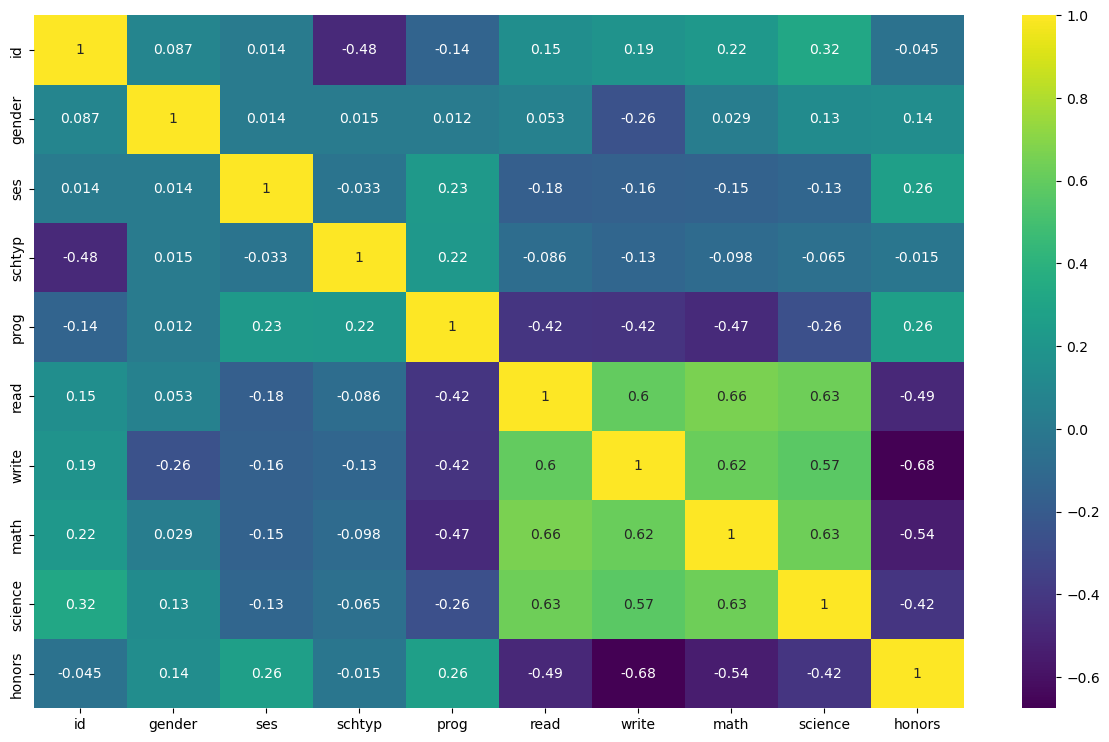

In [113]:
# Heat map

fig = plt.figure(figsize = (15,9))
sns.heatmap(data.corr(), cmap='viridis', annot = True) 

In [114]:
# Spliting the data

X = data.drop('honors', axis = 1)
Y = data.honors

In [115]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)

In [116]:
# Importing the train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [117]:
# Creating the Model

from sklearn.linear_model import LogisticRegression

In [118]:
model = LogisticRegression(multi_class = "multinomial", solver = "newton-cg")
model.fit(x_train, y_train)

# Checking the model score

model.score(X, Y)

0.68

In [119]:
y_pred = model.predict(x_test)

In [120]:
# Test accuracy 

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7

In [121]:
# Train accuracy 

y_preds = model.predict(x_train)

accuracy_score(y_train, y_preds) 

0.675

In [122]:
# Creating another model

model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model1.fit(x_train, y_train)

#checking the model1 score

model.score(X, Y)

0.68

In [123]:
y_pred = model1.predict(x_test)

In [124]:
# Test accuracy 

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7

In [125]:
# Train accuracy 

y_preds = model1.predict(x_train)

accuracy_score(y_train, y_preds) 

0.675

In [126]:
# Confussion_matrix

from sklearn.metrics import confusion_matrix

In [127]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[53, 13,  5],
       [ 9, 41, 13],
       [14,  6, 46]], dtype=int64)

### Result : This model has score with more than 66% , as these are nearby so concluding by saying it is right fit.